**1. IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

**2. LOAD DATA**

In [ ]:
df=pd.read_csv('/content/Water_Potability_Data.csv')

In [ ]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
100493,8.877281,246.101865,21178.737744,7.765320,343.078182,753.380312,16.941735,60.423472,3.091997,0
100494,7.278621,212.564507,38712.303513,5.798552,262.091710,332.442841,14.053881,70.343043,4.816059,0
100495,7.379448,267.665887,15815.433781,10.525736,333.737272,541.727616,13.361341,54.616800,4.730908,0
100496,6.778115,175.896429,21467.765391,7.103072,349.541131,427.190858,12.543752,55.262978,2.847829,0


In [ ]:
print("First 5 Rows:")
print(df.head())

First 5 Rows:
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
print("Last 5 Rows:")
print(df.tail())

Last 5 Rows:
              ph    Hardness        Solids  Chloramines     Sulfate  \
100493  8.877281  246.101865  21178.737744     7.765320  343.078182   
100494  7.278621  212.564507  38712.303513     5.798552  262.091710   
100495  7.379448  267.665887  15815.433781    10.525736  333.737272   
100496  6.778115  175.896429  21467.765391     7.103072  349.541131   
100497  7.537867  216.387845   9470.095665     4.987212  341.496198   

        Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
100493    753.380312       16.941735        60.423472   3.091997           0  
100494    332.442841       14.053881        70.343043   4.816059           0  
100495    541.727616       13.361341        54.616800   4.730908           0  
100496    427.190858       12.543752        55.262978   2.847829           0  
100497    501.388906       11.258956        52.974783   3.743973           1  


In [ ]:
print("Dataset Shape:")
print(df.shape)

Dataset Shape:
(100498, 10)


In [ ]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100498 entries, 0 to 100497
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ph               100498 non-null  float64
 1   Hardness         100498 non-null  float64
 2   Solids           100498 non-null  float64
 3   Chloramines      100498 non-null  float64
 4   Sulfate          100498 non-null  float64
 5   Conductivity     100498 non-null  float64
 6   Organic_carbon   100498 non-null  float64
 7   Trihalomethanes  100498 non-null  float64
 8   Turbidity        100498 non-null  float64
 9   Potability       100498 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.7 MB
None


In [ ]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                  ph       Hardness         Solids    Chloramines  \
count  100498.000000  100498.000000  100498.000000  100498.000000   
mean        7.083208     196.424424   22029.451565       7.115412   
std         1.464982      32.934501    8761.699230       1.585023   
min        -0.049339      47.383515     315.974095       0.304924   
25%         6.287075     176.831117   15717.267182       6.122951   
50%         7.076855     196.936950   20978.409984       7.123246   
75%         7.863236     216.751923   27351.759222       8.102639   
max        14.049287     323.173365   61232.188898      13.176798   

             Sulfate   Conductivity  Organic_carbon  Trihalomethanes  \
count  100498.000000  100498.000000   100498.000000    100498.000000   
mean      333.658496     425.891468       14.280623        66.420605   
std        36.123455      80.793248        3.304995        15.770597   
min       128.955406     181.435063        2.154306         0.691049  

In [ ]:
print("Column Names:")
print(df.columns)

Column Names:
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [ ]:
print("Data Types:")
print(df.dtypes)

Data Types:
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [ ]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [ ]:
print("Duplicate Rows:")
print(df.duplicated().sum())

Duplicate Rows:
0


**3. OUTLIER ANALYSIS AND TREATMENT**

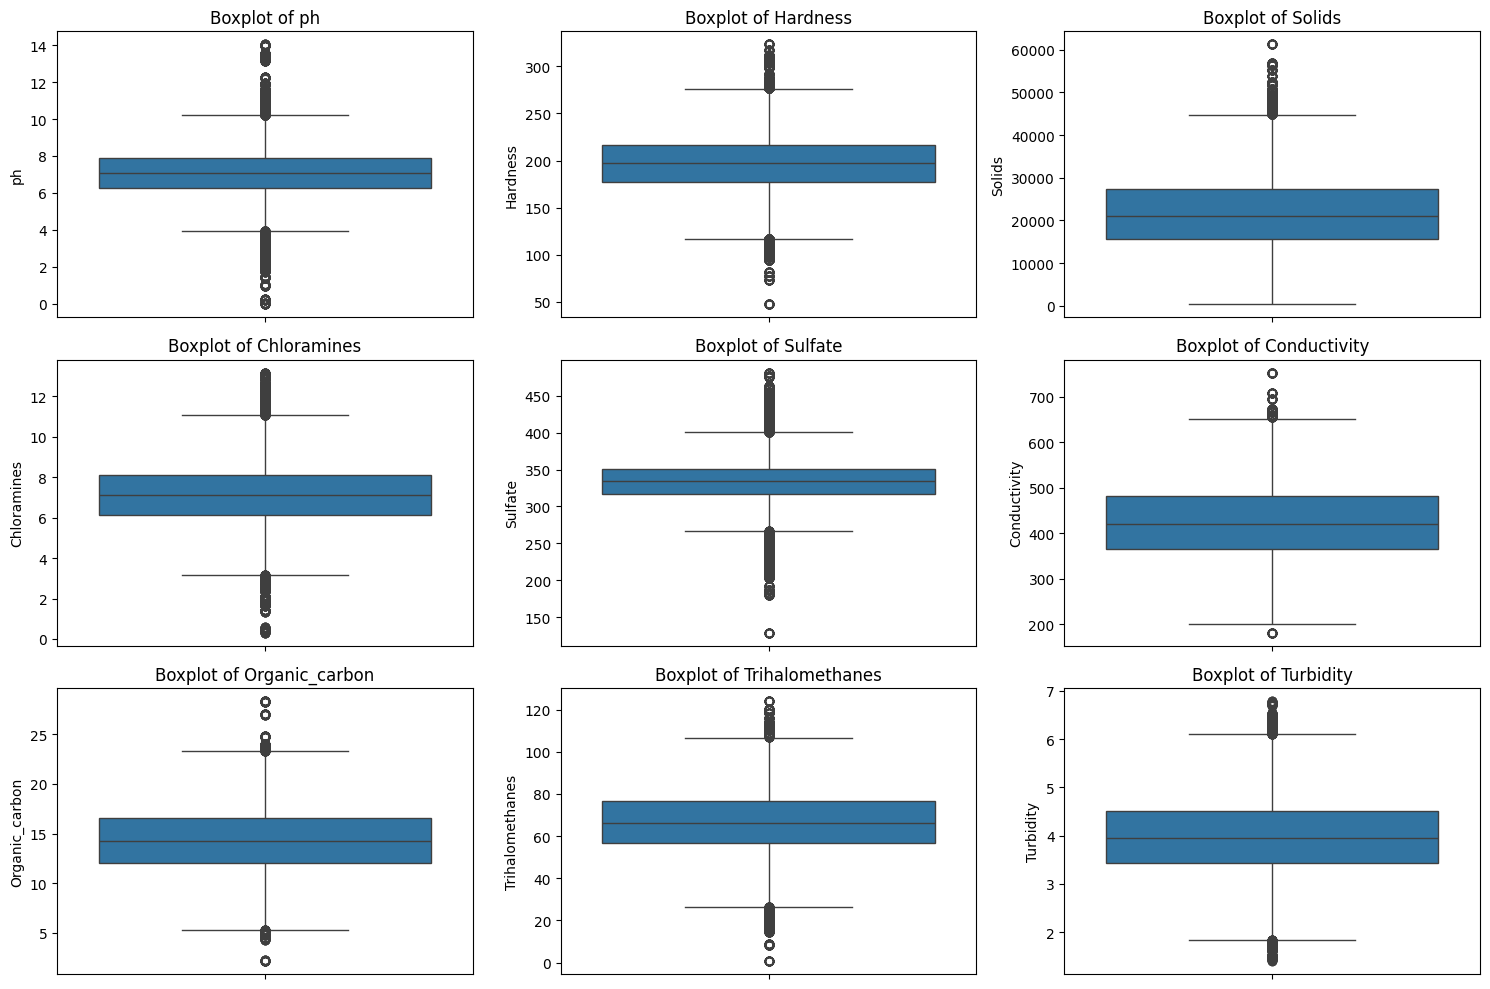

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):  # Skip target column
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

outlier_counts = {}


for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

print("Outlier Counts by Feature:\n")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Outlier Counts by Feature:

ph: 4524 outliers
Hardness: 2515 outliers
Solids: 1461 outliers
Chloramines: 1893 outliers
Sulfate: 7860 outliers
Conductivity: 332 outliers
Organic_carbon: 704 outliers
Trihalomethanes: 1618 outliers
Turbidity: 554 outliers


In [ ]:
df['ph'] = df['ph'].clip(lower=0, upper=14)          # chemistry limit
df['Sulfate'] = df['Sulfate'].clip(upper=1000)       # WHO guideline
df['Conductivity'] = df['Conductivity'].clip(upper=400)  # WHO guideline

In [ ]:
for col in ['Hardness','Solids','Chloramines',
            'Organic_carbon','Trihalomethanes','Turbidity']:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

In [ ]:
numeric_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

outlier_counts = {}

# Detect outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

print("Outlier Counts by Feature:\n")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask'

Outlier Counts by Feature:

ph: 4524 outliers
Hardness: 2515 outliers
Solids: 1461 outliers
Chloramines: 0 outliers
Sulfate: 7860 outliers
Conductivity: 7521 outliers
Organic_carbon: 0 outliers
Trihalomethanes: 0 outliers
Turbidity: 0 outliers


**4. EDA: CORRELATION & DISTRIBUTIONS**

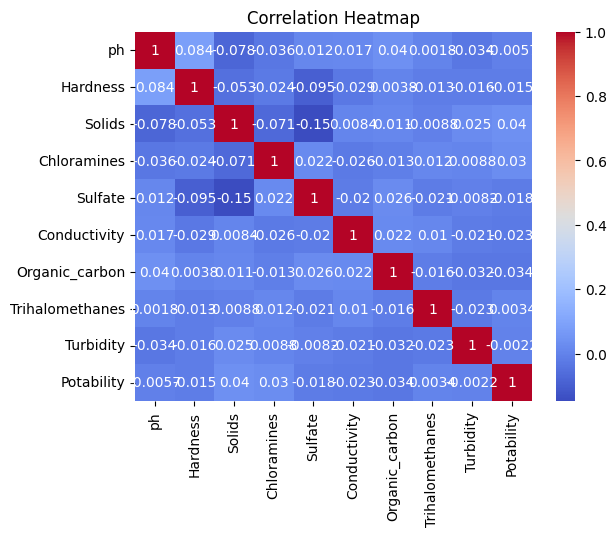

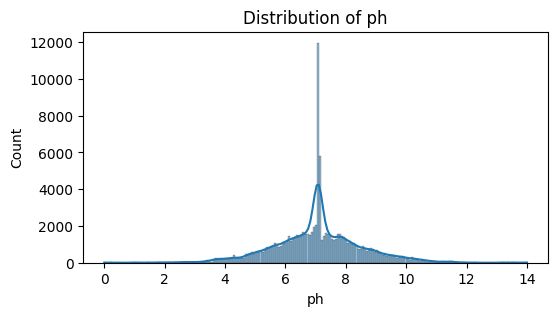

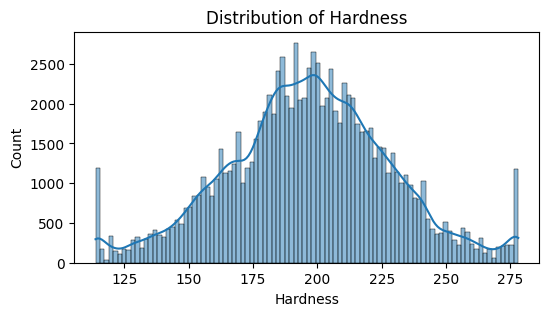

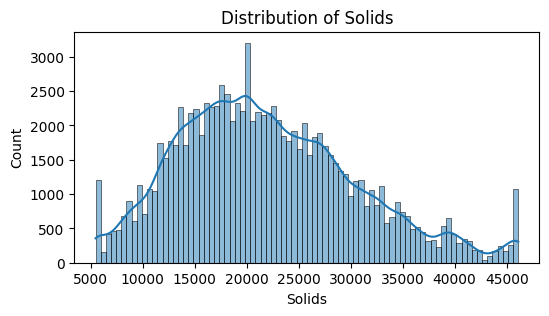

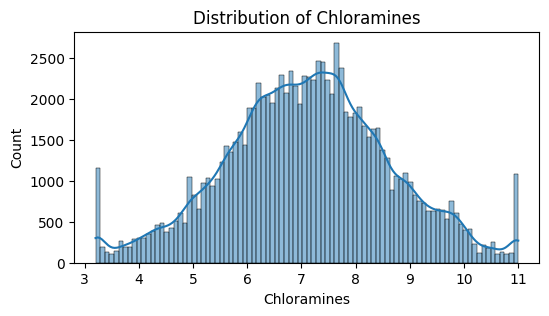

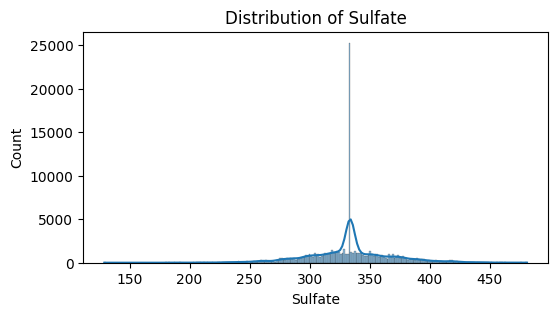

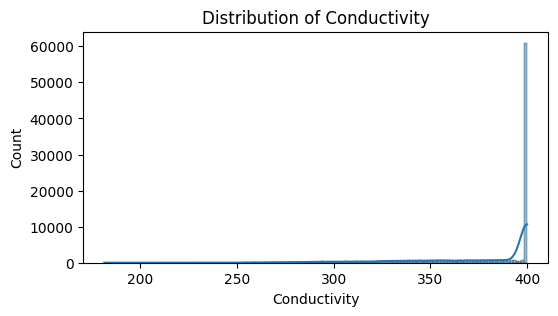

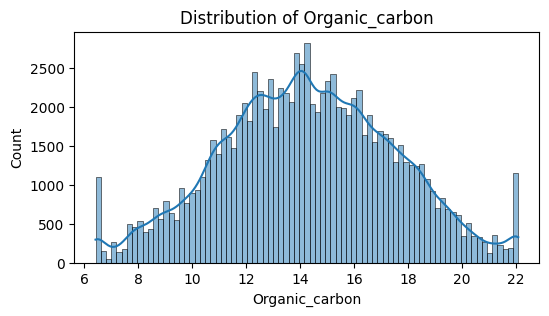

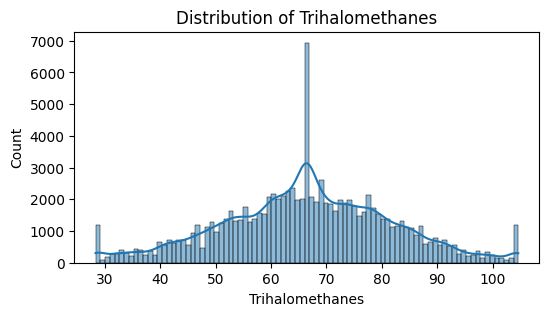

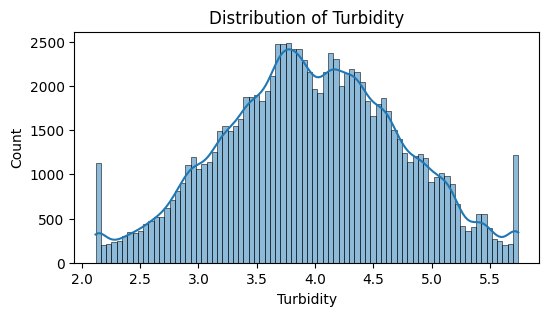

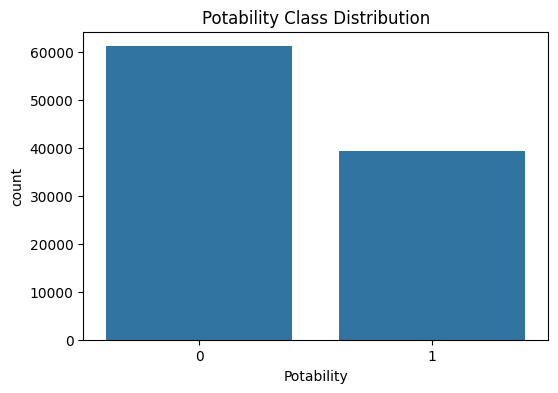

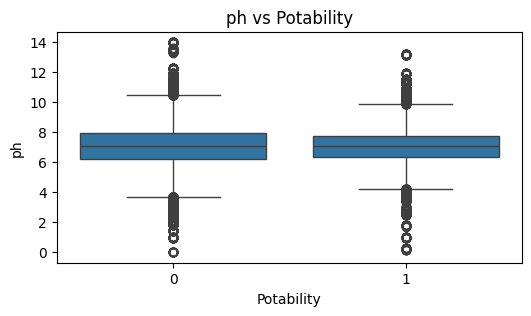

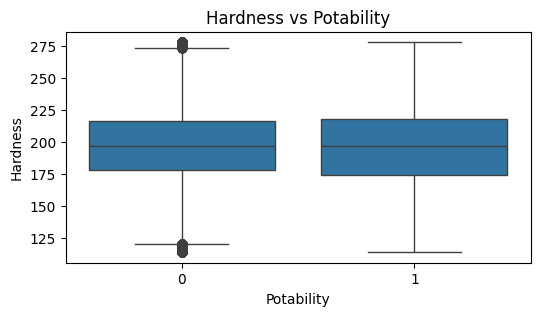

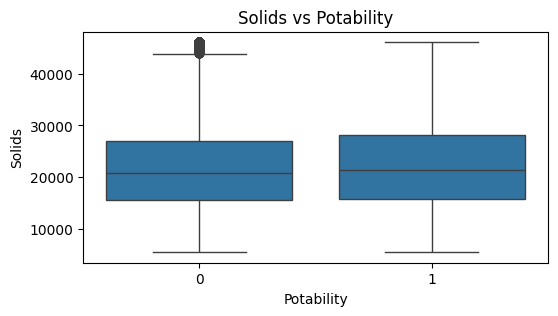

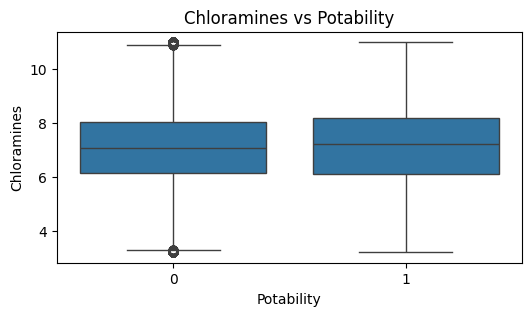

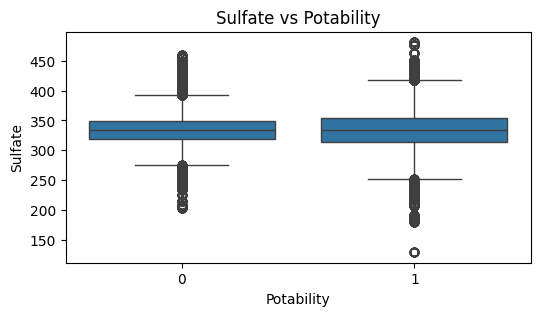

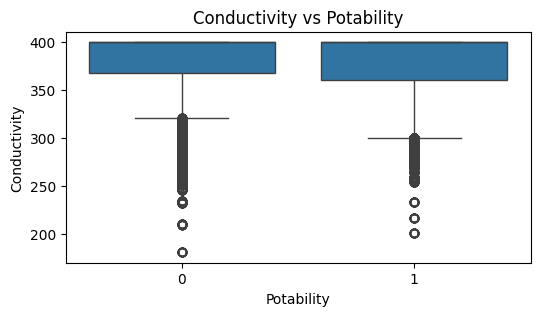

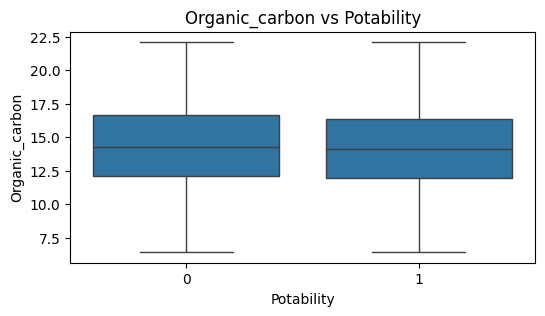

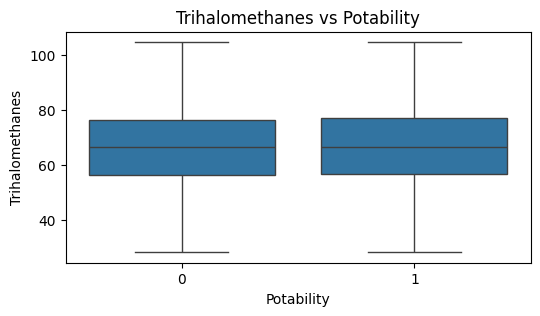

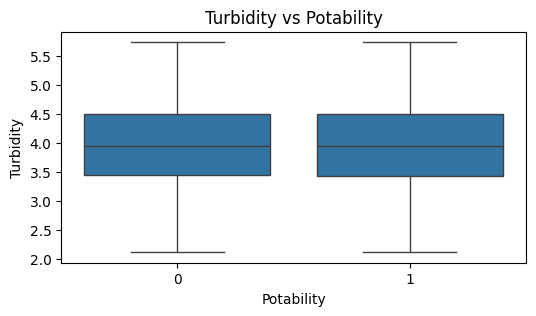

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Potability')
plt.title("Potability Class Distribution")
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Potability', y=col, data=df)
    plt.title(f'{col} vs Potability')
    plt.show()

In [ ]:
df['Potability'].unique()

array([0, 1])

In [ ]:
df['ph'].unique()

array([7.0807945 , 3.71608008, 8.09912419, ..., 7.37944753, 6.77811514,
       7.53786721])

In [ ]:
print(" Unique Values, Min, Max, and Range per Column:\n")

for col in df.columns:
    print(f"Column: {col}")

    unique_vals = df[col].unique()
    print(f" Unique values ({len(unique_vals)}): {unique_vals}")

    col_min = df[col].min()
    col_max = df[col].max()
    col_range = col_max - col_min

    print(f" Min: {col_min}")
    print(f" Max: {col_max}")
    print(f" Range: {col_range}\n")


 Unique Values, Min, Max, and Range per Column:

Column: ph
 Unique values (99966): [7.0807945  3.71608008 8.09912419 ... 7.37944753 6.77811514 7.53786721]
 Min: 0.0
 Max: 14.0
 Range: 14.0

Column: Hardness
 Unique values (98490): [204.89045547 129.42292051 224.23625939 ... 267.66588677 175.89642878
 216.38784501]
 Min: 113.78568495211648
 Max: 278.086017285955
 Range: 164.30033233383853

Column: Solids
 Unique values (98490): [20791.31898075 18630.05785797 19909.54173229 ... 15815.43378131
 21467.76539114  9470.09566508]
 Min: 5479.629661421412
 Max: 46112.67574231922
 Range: 40633.04608089781

Column: Chloramines
 Unique values (98490): [ 7.30021187  6.63524588  9.2758836  ... 10.52573591  7.10307191
  4.98721225]
 Min: 3.202463463025365
 Max: 11.001827219159985
 Range: 7.799363756134619

Column: Sulfate
 Unique values (99718): [368.51644135 333.77577661 356.88613564 ... 333.73727215 349.54113116
 341.49619764]
 Min: 128.95540592457954
 Max: 481.0784151853521
 Range: 352.12300926077

In [ ]:
print(df['Potability'].value_counts())

Potability
0    61110
1    39388
Name: count, dtype: int64


**5. DATA SPLITTING & SCALING**

In [ ]:
X=df.drop('Potability',axis=1)
y=df['Potability']

In [ ]:
y

,Potability
0,0
1,0
2,0
3,0
4,0
...,...
100493,0
100494,0
100495,0
100496,0


In [ ]:
X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
print("Training Set Shape", X_train.shape)
print("Testing Set Shape", X_test.shape)

Training Set Shape (80398, 9)
Testing Set Shape (20100, 9)


In [ ]:
print("Training Set Shape", y_train.shape)
print("Testing Set Shape", y_test.shape)

Training Set Shape (80398,)
Testing Set Shape (20100,)


In [ ]:
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**6. ANN MODEL**

In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
checkpoint=ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=60,
    batch_size=30,
    validation_split=0.20,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/60
2135/2144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6531 - loss: 0.6289
Epoch 1: val_loss improved from inf to 0.56136, saving model to best_model.keras
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6532 - loss: 0.6288 - val_accuracy: 0.7189 - val_loss: 0.5614
Epoch 2/60
2123/2144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7053 - loss: 0.5694
Epoch 2: val_loss improved from 0.56136 to 0.50510, saving model to best_model.keras
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7054 - loss: 0.5693 - val_accuracy: 0.7438 - val_loss: 0.5051
Epoch 3/60
2123/2144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7285 - loss: 0.5329
Epoch 3: val_loss improved from 0.50510 to 0.46564, saving model to best_model.keras
2144/2144 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7285 - loss: 0.5328 - val_accuracy: 0.7808 - val_loss: 0.4656
Epoch 4/60
2131/2144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7554 - loss: 0.4979
Epoch 4: val_loss improved from 0.46564

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss:", loss)
print(f"Test Accuracy:", accuracy)

629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.1124
Test Loss: 0.11055228114128113
Test Accuracy: 0.9809949994087219


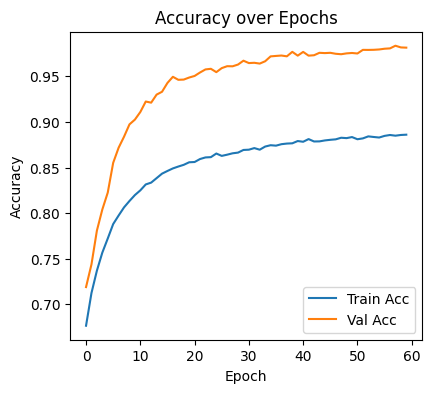

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

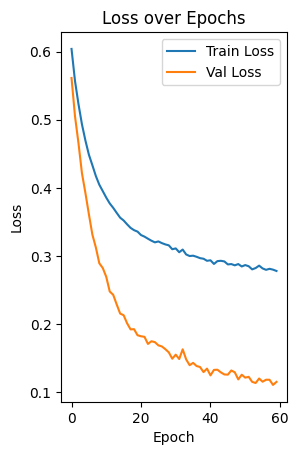

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

In [ ]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
print(f"Train Accuracy: {final_train_acc:.4f}")
print(f"Validation Accuracy: {final_val_acc:.4f}")

Train Accuracy: 0.8860
Validation Accuracy: 0.9815


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9803 - loss: 0.1124
Test Accuracy: 0.9810


In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

629/629 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[12081   141]
 [  241  7637]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     12222
           1       0.98      0.97      0.98      7878

    accuracy                           0.98     20100
   macro avg       0.98      0.98      0.98     20100
weighted avg       0.98      0.98      0.98     20100



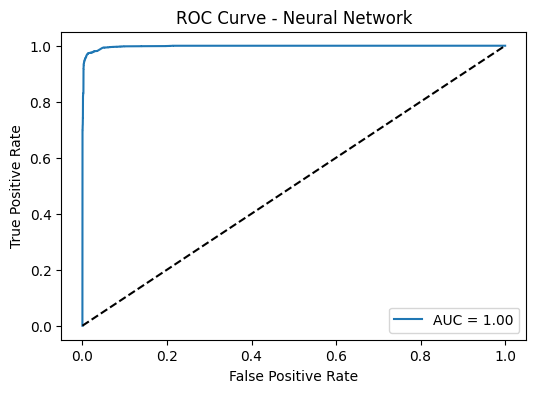

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend()
plt.show()

In [ ]:
def predict_water_potability(model, scaler):
    sample_input = {
        'ph': 7.2,
        'Hardness': 190.0,
        'Solids': 14000.0,
        'Chloramines': 3.0,
        'Sulfate': 370.0,
        'Conductivity': 350.0,
        'Organic_carbon': 1.5,
        'Trihalomethanes': 60.0,
        'Turbidity': 3.5
    }

    input_array = np.array([list(sample_input.values())])
    input_scaled = scaler.transform(input_array)
    probability = model.predict(input_scaled)[0][0]
    predicted_class = int(probability > 0.5)

    print("Input Features:")
    for k, v in sample_input.items():
        print(f"  {k}: {v}")

    print(f"\n Predicted Probability of being potable: {probability:.4f}")
    print(f" Predicted Class: {'Potable (1) ' if predicted_class == 1 else 'Not Potable (0) ❌'}")

    return input_scaled, probability, predicted_class
predict_water_potability(model, scaler)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Input Features:
  ph: 7.2
  Hardness: 190.0
  Solids: 14000.0
  Chloramines: 3.0
  Sulfate: 370.0
  Conductivity: 350.0
  Organic_carbon: 1.5
  Trihalomethanes: 60.0
  Turbidity: 3.5

 Predicted Probability of being potable: 0.0073
 Predicted Class: Not Potable (0) ❌


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


(array([[ 0.07823927, -0.17667354, -0.60415999, -2.07802946,  1.07653081,
         -1.44640819, -2.82624445, -0.31826937, -0.42562681]]),
 np.float32(0.0072737634),
 0)

In [ ]:
def predict_water_potability(model, scaler):
    sample_input = {
        'ph': 7.5,
        'Hardness': 180.0,
        'Solids': 10000.0,
        'Chloramines': 2.5,
        'Sulfate': 290.0,
        'Conductivity': 300.0,
        'Organic_carbon': 1.2,
        'Trihalomethanes': 55.0,
        'Turbidity': 3.2
    }

    input_array = np.array([list(sample_input.values())])
    input_scaled = scaler.transform(input_array)
    probability = model.predict(input_scaled)[0][0]
    predicted_class = int(probability > 0.5)

    print("Input Features:")
    for k, v in sample_input.items():
        print(f"  {k}: {v}")

    print(f"\nPredicted Probability of being potable: {probability:.4f}")
    print(f"Predicted Class: {'Potable (1)' if predicted_class == 1 else 'Not Potable (0)'}")

    return input_scaled, probability, predicted_class

predict_water_potability(model, scaler)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


Input Features:
  ph: 7.5
  Hardness: 180.0
  Solids: 10000.0
  Chloramines: 2.5
  Sulfate: 290.0
  Conductivity: 300.0
  Organic_carbon: 1.2
  Trihalomethanes: 55.0
  Turbidity: 3.2

Predicted Probability of being potable: 0.0666
Predicted Class: Not Potable (0)


(array([[ 0.2694802 , -0.42668536, -0.94831382, -2.32989804, -1.30089151,
         -2.89281639, -2.89289184, -0.56678985, -0.70792308]]),
 np.float32(0.06657319),
 0)

In [ ]:
def predict_water_potability(model, scaler):
    sample_input = {
        'ph': 4.5,
        'Hardness': 320.0,
        'Solids': 50000.0,
        'Chloramines': 9.5,
        'Sulfate': 950.0,
        'Conductivity': 490.0,
        'Organic_carbon': 20.0,
        'Trihalomethanes': 115.0,
        'Turbidity': 5.5
    }

    input_array = np.array([list(sample_input.values())])
    input_scaled = scaler.transform(input_array)
    probability = model.predict(input_scaled)[0][0]
    predicted_class = int(probability > 0.5)

    print("Input Features:")
    for k, v in sample_input.items():
        print(f"  {k}: {v}")

    print(f"\nPredicted Probability of being potable: {probability:.4f}")
    print(f"Predicted Class: {'Potable (1)' if predicted_class == 1 else 'Not Potable (0)'}")

    return input_scaled, probability, predicted_class

predict_water_potability(model, scaler)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Input Features:
  ph: 4.5
  Hardness: 320.0
  Solids: 50000.0
  Chloramines: 9.5
  Sulfate: 950.0
  Conductivity: 490.0
  Organic_carbon: 20.0
  Trihalomethanes: 115.0
  Turbidity: 5.5

Predicted Probability of being potable: 0.9999
Predicted Class: Potable (1)


(array([[-1.64292908,  3.07348015,  2.49322447,  1.1962621 , 18.31284265,
          2.60353475,  1.28367845,  2.41545592,  1.45634837]]),
 np.float32(0.99994344),
 1)

In [ ]:
def predict_water_potability(model, scaler):
    sample_input = {
        'ph': 7.0,
        'Hardness': 160.0,
        'Solids': 9000.0,
        'Chloramines': 2.2,
        'Sulfate': 300.0,
        'Conductivity': 290.0,
        'Organic_carbon': 1.1,
        'Trihalomethanes': 50.0,
        'Turbidity': 3.0
    }

    input_array = np.array([list(sample_input.values())])
    input_scaled = scaler.transform(input_array)
    probability = model.predict(input_scaled)[0][0]
    predicted_class = int(probability > 0.5)

    print("Input Features:")
    for k, v in sample_input.items():
        print(f"  {k}: {v}")

    print(f"\nPredicted Probability of being potable: {probability:.4f}")
    print(f"Predicted Class: {'Potable (1)' if predicted_class == 1 else 'Not Potable (0)'}")

    return input_scaled, probability, predicted_class

predict_water_potability(model, scaler)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Input Features:
  ph: 7.0
  Hardness: 160.0
  Solids: 9000.0
  Chloramines: 2.2
  Sulfate: 300.0
  Conductivity: 290.0
  Organic_carbon: 1.1
  Trihalomethanes: 50.0
  Turbidity: 3.0

Predicted Probability of being potable: 0.1331
Predicted Class: Not Potable (0)


(array([[-0.04925468, -0.92670901, -1.03435227, -2.48101919, -1.00371372,
         -3.18209803, -2.91510764, -0.81531033, -0.8961206 ]]),
 np.float32(0.13309863),
 0)